In [1]:
#tensorflow_version 1.x

from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
import tensorflow
tensorflow.__version__

'2.4.1'

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = "C:/Users/sonou/Desktop/train"

validation_dir = "C:/Users/sonou/Desktop/test"

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 972 files belonging to 2 classes.
Found 324 files belonging to 2 classes.


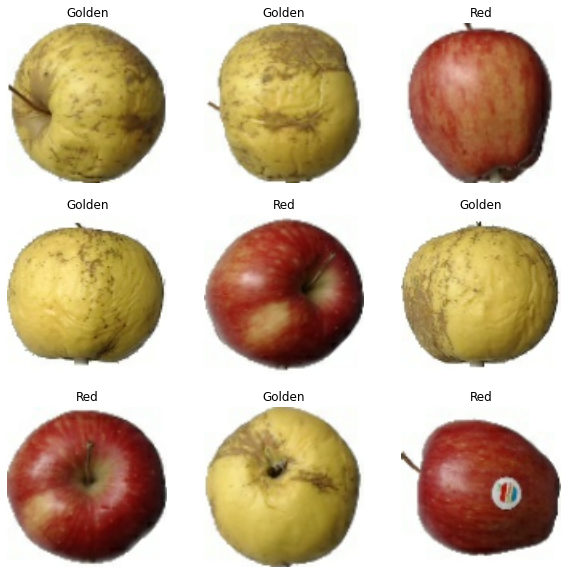

In [23]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

first model

In [24]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [25]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

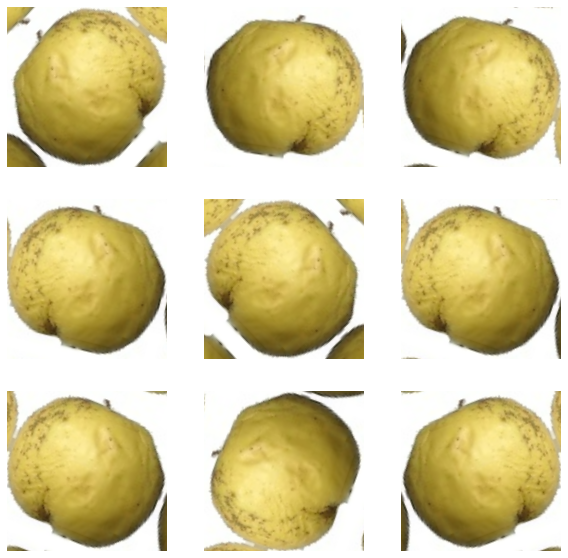

In [37]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

num_classes = 2
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
epochs = 5

history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)


Epoch 1/5
31/31 [==============================] - 18s 547ms/step - loss: 0.6945 - accuracy: 0.6880 - val_loss: 3.3140e-04 - val_accuracy: 1.0000
Epoch 2/5
31/31 [==============================] - 15s 473ms/step - loss: 3.2864e-05 - accuracy: 1.0000 - val_loss: 2.4287e-06 - val_accuracy: 1.0000
Epoch 3/5
31/31 [==============================] - 13s 415ms/step - loss: 5.3320e-07 - accuracy: 1.0000 - val_loss: 1.4548e-06 - val_accuracy: 1.0000
Epoch 4/5
31/31 [==============================] - 13s 409ms/step - loss: 2.6070e-07 - accuracy: 1.0000 - val_loss: 1.3959e-06 - val_accuracy: 1.0000
Epoch 5/5
31/31 [==============================] - 13s 408ms/step - loss: 2.8565e-07 - accuracy: 1.0000 - val_loss: 1.3989e-06 - val_accuracy: 1.0000


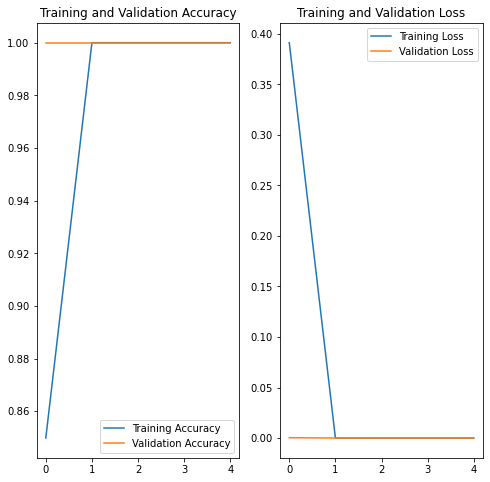

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 160, 160, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 160, 160, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 40, 40, 64)       